In [32]:
%matplotlib inline

# Piecewise Affine Transformation

This example shows how to use the Piecewise Affine Transformation.


In [33]:
import matplotlib.pyplot as plt
import cupy as cp
import numpy as np
from skimage import data
# from skimage.transform import PiecewiseAffineTransform, warp
from cucim.skimage.transform import PiecewiseAffineTransform, warp

In [34]:
image = cp.asarray(data.astronaut())
rows, cols = image.shape[0], image.shape[1]
image.shape


(512, 512, 3)

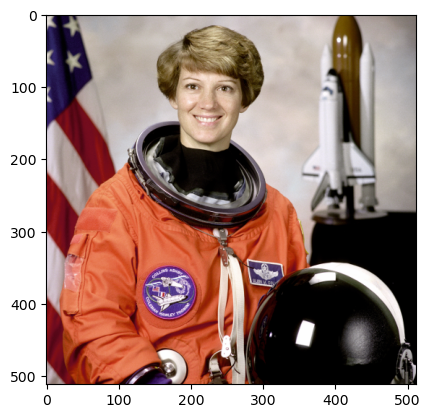

In [35]:
plt.imshow(image.get())


In [36]:
src_cols = cp.linspace(0, cols, 20)
src_rows = cp.linspace(0, rows, 10)
src_rows, src_cols = cp.meshgrid(src_rows, src_cols)
src = cp.dstack([src_cols.flatten(), src_rows.flatten()])[0]
src.shape


(200, 2)

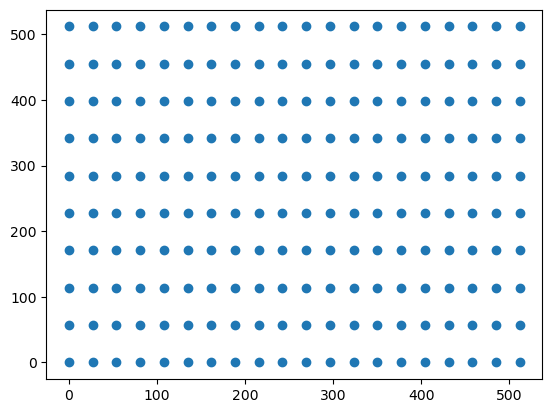

In [37]:
plt.scatter(src_cols.get(), src_rows.get())


In [38]:
# add sinusoidal oscillation to row coordinates
dst_rows = src[:, 1] - cp.sin(cp.linspace(0, 3 * cp.pi, src.shape[0])) * 50
dst_cols = src[:, 0]
dst_rows *= 1.5
dst_rows -= 1.5 * 50
dst = cp.vstack([dst_cols, dst_rows]).T
dst.shape


(200, 2)

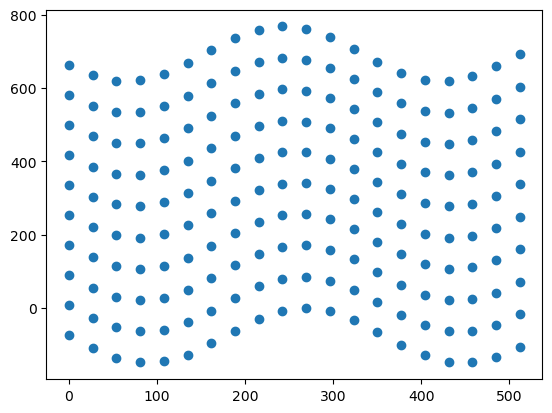

In [39]:
plt.scatter(dst_cols.get(), dst_rows.get())


In [40]:
tform = PiecewiseAffineTransform()
tform.estimate(src, dst)


/tmp/ipykernel_2194/3489493659.py:2: DeprecationWarning: Delaunay attribute 'vertices' is deprecated in favour of 'simplices' and will be removed in Scipy 1.11.0.
  tform.estimate(src, dst)


True

In [41]:
out_rows = image.shape[0] - 1.5 * 50
out_cols = cols
out = warp(image, tform, output_shape=(out_rows, out_cols))


/tmp/ipykernel_2194/2706367256.py:3: DeprecationWarning: Delaunay attribute 'vertices' is deprecated in favour of 'simplices' and will be removed in Scipy 1.11.0.
  ax.plot(tform.inverse(src)[:, 0].get(), tform.inverse(src)[:, 1].get(), ".b")


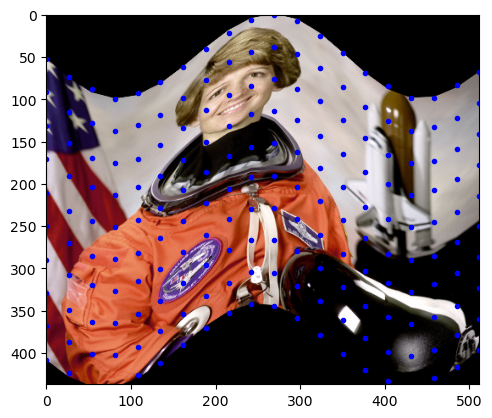

In [42]:
fig, ax = plt.subplots()
ax.imshow(out.get())
ax.plot(tform.inverse(src)[:, 0].get(), tform.inverse(src)[:, 1].get(), ".b")
ax.axis((0, out_cols, out_rows, 0))
plt.show()


# Economics Example


In [43]:
n = 50
m = 50
x_grid = cp.linspace(1, 11, n)
y_grid = cp.empty(m)

x_mat, y_mat = cp.meshgrid(x_grid, y_grid, indexing="ij")
u_mat = cp.empty_like(x_mat)

u_mat.shape


(50, 50)

In [44]:
for i in range(u_mat.shape[1]):
    u_mat[:, i] = (i + 1) *2
    y_mat[:, i] = u_mat[:, i] / x_mat[:, i]


## Source Data


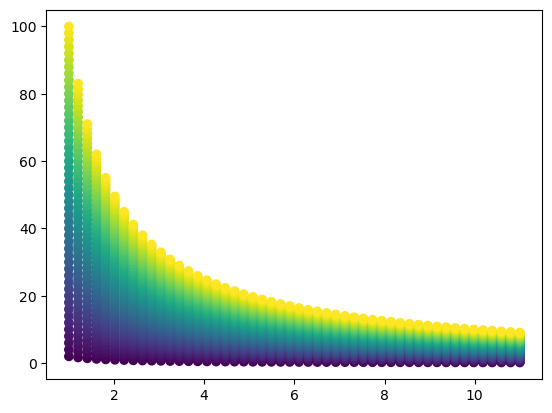

In [45]:
plt.scatter(x_mat.get(), y_mat.get(), c=u_mat.get())


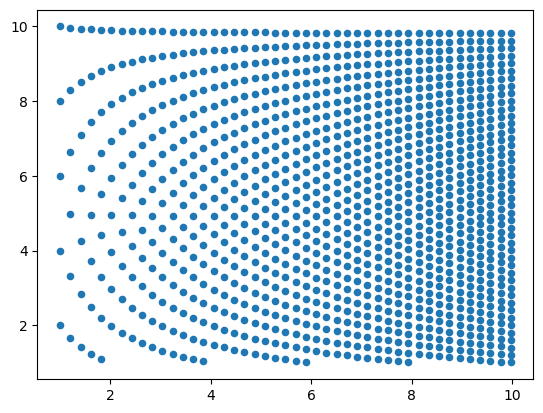

In [46]:
cond = np.logical_and.reduce((x_mat.get() <= 10, y_mat.get() <= 10, x_mat.get() >= 1, y_mat.get() >= 1))

plt.scatter(
    x_mat[cond].get(),
    y_mat[cond].get(),
    s=20,
)


(1.0, 10.0)

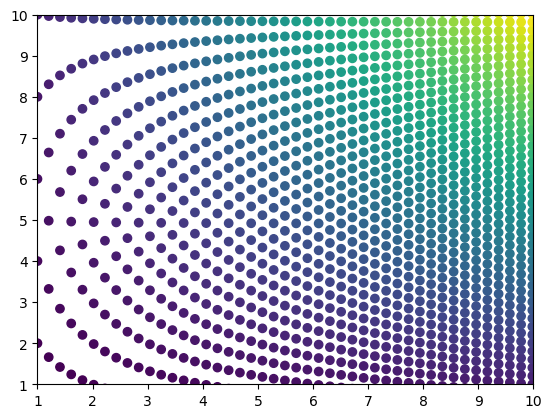

In [47]:
plt.scatter(x_mat.get(), y_mat.get(), c=u_mat.get())
plt.xlim(1, 10)
plt.ylim(1, 10)


In [48]:
src = cp.dstack([x_mat.flatten(), y_mat.flatten()])[0]
src.shape


(2500, 2)

In [49]:
dst_x, dst_y = cp.mgrid[0:n, 0:m]


## Destination


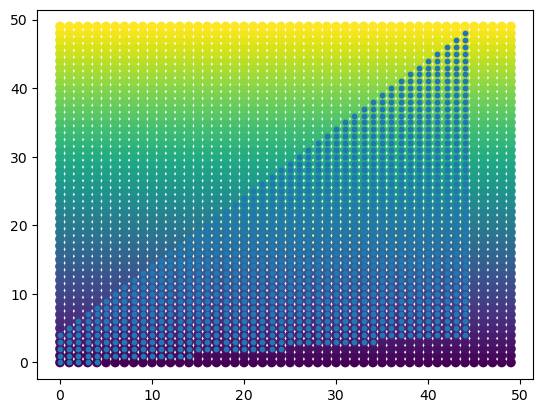

In [50]:
plt.scatter(dst_x.get(), dst_y.get(), c=u_mat.get())
plt.scatter(
    dst_x[cond].get(),
    dst_y[cond].get(),
    s=10,
)


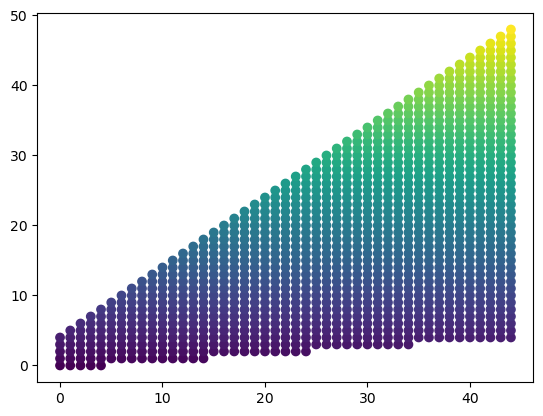

In [51]:
plt.scatter(
    dst_x[cond].get(),
    dst_y[cond].get(),
    c=u_mat[cond].get(),
)


In [52]:
dst = cp.vstack([dst_x.flatten(), dst_y.flatten()]).T
dst.shape


(2500, 2)

In [53]:
tform = PiecewiseAffineTransform()
tform.estimate(src, dst)


/tmp/ipykernel_2194/3489493659.py:2: DeprecationWarning: Delaunay attribute 'vertices' is deprecated in favour of 'simplices' and will be removed in Scipy 1.11.0.
  tform.estimate(src, dst)


True

/tmp/ipykernel_2194/4212653992.py:1: DeprecationWarning: Delaunay attribute 'vertices' is deprecated in favour of 'simplices' and will be removed in Scipy 1.11.0.
  out = tform(src)


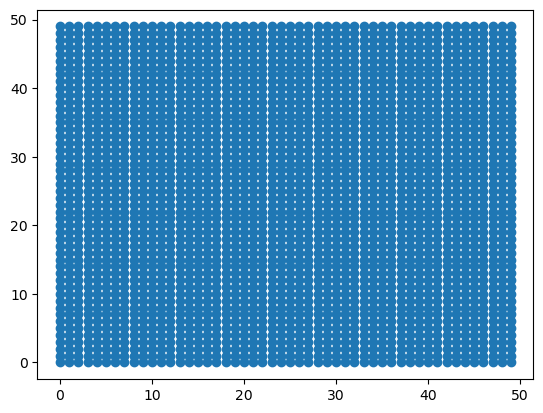

In [54]:
out = tform(src)
x_out, y_out = out[:, 0], out[:, 1]
plt.scatter(x_out.get(), y_out.get())


/tmp/ipykernel_2194/3004079744.py:1: DeprecationWarning: Delaunay attribute 'vertices' is deprecated in favour of 'simplices' and will be removed in Scipy 1.11.0.
  out = tform.inverse(dst)


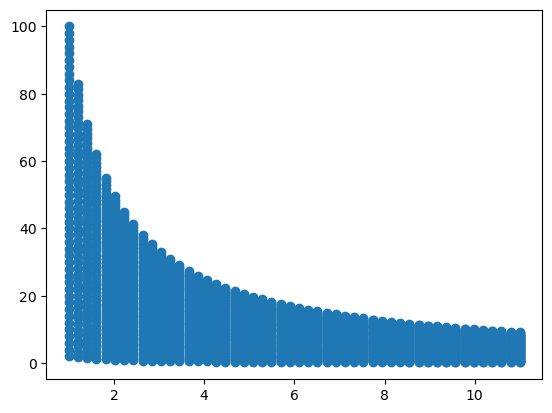

In [55]:
out = tform.inverse(dst)
x_out, y_out = out[:, 0], out[:, 1]
plt.scatter(x_out.get(), y_out.get())


In [56]:
out_m = 10
out_n = 10
out = warp(u_mat, tform, output_shape=(out_m, out_n))


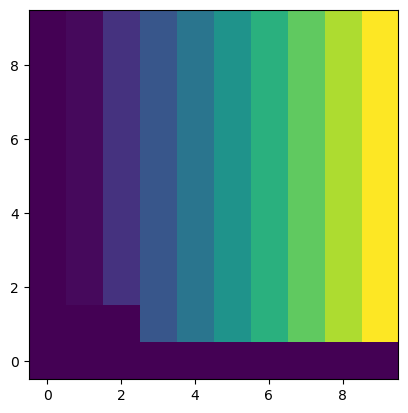

In [57]:
fig, ax = plt.subplots()
ax.imshow(out.get(), origin="lower")
plt.show()


In [58]:
x_new = cp.linspace(1, 10, 100)
y_new = cp.linspace(1, 10, 100)

x_new, y_new = cp.meshgrid(x_new, y_new, indexing="ij")


/tmp/ipykernel_2194/171867244.py:2: DeprecationWarning: Delaunay attribute 'vertices' is deprecated in favour of 'simplices' and will be removed in Scipy 1.11.0.
  out = tform(src_new)


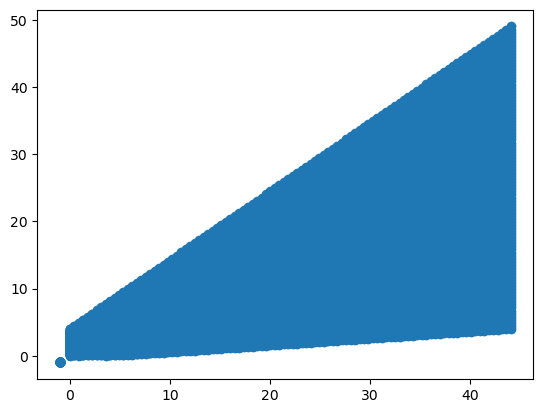

In [59]:
src_new = cp.dstack([x_new.flatten(), y_new.flatten()])[0]
out = tform(src_new)
x_out = out[:, 0].reshape(x_new.shape)
y_out = out[:, 1].reshape(y_new.shape)


plt.scatter(x_out.get(), y_out.get())


In [61]:
from cupyx.scipy.ndimage import map_coordinates

u_out = map_coordinates(u_mat, cp.asarray([x_out, y_out]), order=1)


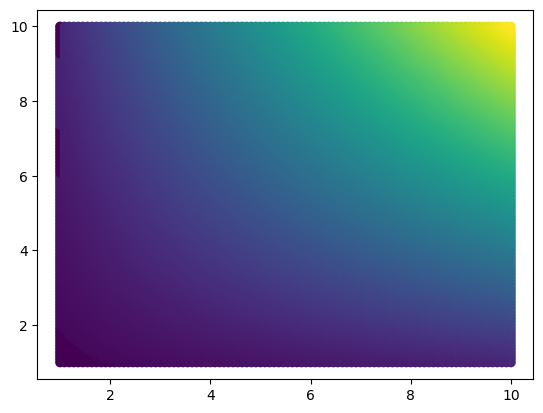

In [62]:
plt.scatter(x_new.get(), y_new.get(), c=u_out.get())


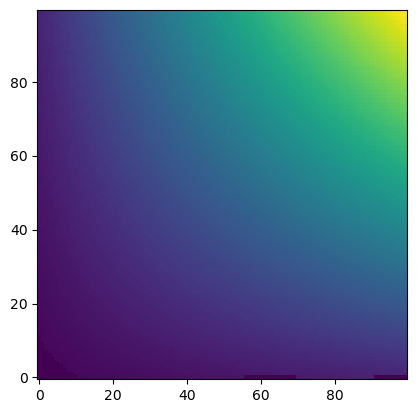

In [64]:
plt.imshow(u_out.get(), origin="lower")


In [ ]:
u_true = x_out * y_out


In [ ]:
u_true - u_out


array([[-1.00000000e+00, -1.09090909e+00, -1.18181818e+00, ...,
        -1.56642376e-14, -1.58257246e-14, -1.59872116e-14],
       [-1.01043282e+00, -1.02191947e+00, -1.03231638e+00, ...,
        -1.96909884e+00, -1.98004659e+00, -1.99106995e+00],
       [-8.32405867e-01, -7.41181644e-01, -6.49288482e-01, ...,
         7.46612872e+00,  7.56104091e+00,  7.65708423e+00],
       ...,
       [ 7.60038475e+02,  8.37093286e+02,  9.14148098e+02, ...,
         8.23171067e+03,  8.30875594e+03,  8.38582029e+03],
       [ 7.75874508e+02,  8.54442767e+02,  9.33011026e+02, ...,
         8.39540857e+03,  8.47396801e+03,  8.55254508e+03],
       [ 7.91891983e+02,  8.71990180e+02,  9.52088378e+02, ...,
         8.56071162e+03,  8.64080173e+03,  8.72081983e+03]])